In [1]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for mode
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [7]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [8]:
data["Treated_with_drugs"].value_counts()



DX6                     4812
DX6                     2383
DX5                     1153
DX2                     1094
DX4                     1045
DX1                     1033
DX3                     1006
dx6                      857
Dx6                      617
DX3                      514
DX2                      513
DX4                      506
DX1                      498
DX5                      481
dx6                      410
Dx6                      276
DX3 DX5                  247
DX1 DX2                  245
DX4 DX5                  244
DX3 DX4                  240
DX2 DX4                  239
DX2 DX3                  230
DX1 DX4                  229
DX2 DX5                  227
DX1 DX5                  224
DX1 DX3                  218
dx1                      192
dx4                      188
dx5                      186
dx3                      182
                        ... 
dx2 dx3 dx4 dx5            3
dx1 dx4 dx5                3
dx1 dx2 dx3 dx5            3
Dx3 dx4 dx5   

In [9]:
data["Treated_with_drugs"]=data["Treated_with_drugs"].str.upper()

In [10]:
data["Treated_with_drugs"].value_counts()

DX6                     6286
DX6                     3069
DX5                     1449
DX2                     1394
DX4                     1360
DX1                     1341
DX3                     1303
DX2                      681
DX3                      665
DX5                      658
DX4                      649
DX1                      649
DX1 DX2                  321
DX3 DX5                  319
DX2 DX4                  308
DX4 DX5                  305
DX2 DX3                  303
DX3 DX4                  298
DX2 DX5                  295
DX1 DX4                  295
DX1 DX5                  293
DX1 DX3                  287
DX2 DX3                  155
DX2 DX4                  153
DX1 DX5                  152
DX3 DX4                  150
DX1 DX4                  149
DX2 DX5                  147
DX4 DX5                  140
DX1 DX2                  139
                        ... 
DX1 DX2 DX4               70
DX1 DX3 DX5               68
DX3 DX4 DX5               68
DX2 DX3 DX4   

In [12]:
data.Patient_Smoker.value_counts()

NO             10511
YES             7833
NO              3891
YES             2710
YESS             100
YESS              26
Cannot say         4
Cannot say         2
CANNOT SAY         1
CANNOT SAY         1
Name: Patient_Smoker, dtype: int64

In [13]:
def smoker(r):
  if (r == "NO") or (r == "NO "):
    return 'NO'
  elif (r == "YES") or (r == "YES ") or (r == "YESS") or (r == "YESS "):
    return 'YES'
  else:
    return 'Cannot say'

data.Patient_Smoker = data.Patient_Smoker.apply(smoker)  # Applying the function to all the entries of Patient_Smoker column

In [14]:
data.Patient_Rural_Urban.value_counts()


RURAL    17482
URBAN     7597
Name: Patient_Rural_Urban, dtype: int64

In [16]:
data.Patient_mental_condition.value_counts()

Stable    25079
Name: Patient_mental_condition, dtype: int64

## EDA


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
ID_Patient_Care_Situation    25079 non-null int64
Diagnosed_Condition          25079 non-null int64
Patient_ID                   25079 non-null int64
Treated_with_drugs           25071 non-null object
Patient_Age                  25079 non-null int64
Patient_Body_Mass_Index      25079 non-null float64
Patient_Smoker               25079 non-null object
Patient_Rural_Urban          25079 non-null object
Patient_mental_condition     25079 non-null object
A                            23723 non-null float64
B                            23723 non-null float64
C                            23723 non-null float64
D                            23723 non-null float64
E                            23723 non-null float64
F                            23723 non-null float64
Z                            23723 non-null float64
Number_of_prev_cond          23723 non-null float64
Survived_1_year    

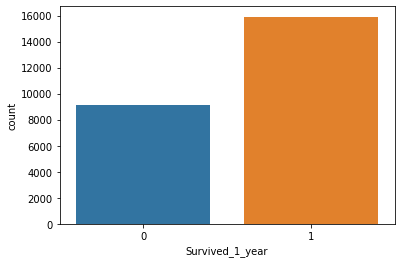

In [18]:
sns.countplot(x="Survived_1_year",data=data)
plt.show(
)

<p>There are 8000 + patients who did not survive after 1 year of treatment and 14000 + patients who survived after 1 year of treatment. The ratio is 1:2 (approx). So there is no class imbalance</p>

<p>Next, we will perform EDA on our continuous variables</p>



In [20]:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.columns


Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [21]:
numeric_data=data[["Diagnosed_Condition","Patient_Age","Patient_Body_Mass_Index",
                  "Number_of_prev_cond","Survived_1_year"]]
numeric_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,47,60,21.655523,2.0,1
1,3,2,28.852743,3.0,0
2,7,20,26.179725,2.0,1
3,31,8,22.638945,2.0,0
4,43,53,21.326131,1.0,1


In [23]:
# Checking the null values in numerical columns
numeric_data.isnull().sum()

Diagnosed_Condition           0
Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1356
Survived_1_year               0
dtype: int64

<p>We can see that 1235 values are missing from 'Number_of_prev_cond' column. We will fill these with the mode.

Why mode? As per the data description this column's value is dependent on the seven columns - 'A', 'B', 'C', 'D', 'E', 'F', 'Z'. These columns have values either 0 or 1. Hence these seven columns are categorical columns. So the column 'Number_of_prev_cond' have discrete values from integers 0 to 7 and can be considered as categorical column as it has only 7 different values. Hence here we can fill the missing values with mode.</p>

In [24]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0])  # filling the missing value of 'Number_of_prev_cond'

numeric_data['Number_of_prev_cond']=data['Number_of_prev_cond']
numeric_data.isnull().sum()

# The returned object by using mode() is a series so we are filling the null value with the value at 0th index ( which gives us the mode of the data)

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

In [25]:
# Taking a look at the basic statistical description of the numerical columns
numeric_data.describe(
)

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000
mean,26.382631,33.193548,23.439952,1.707803,0.634316
std,15.096967,19.507617,3.778849,0.768082,0.481631
min,0.000000,0.000000,1.089300,1.000000,0.000000
25%,13.000000,16.000000,20.205050,1.000000,0.000000
50%,26.000000,33.000000,23.369168,2.000000,1.000000
75%,40.000000,50.000000,26.730785,2.000000,1.000000
max,52.000000,142.000000,29.999579,5.000000,1.000000


## Observations
<p>The minimum and maximum values for all the numerical columns.
The mean and median (i.e. 50%) value for all the numerical columns are nearly same.
A good way to visualize the above information would be boxplots.</p>

## Box Plot


<p>A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.

The median gets drawn somewhere inside the box and then you see the most extreme non-outliers to finish the plot. Those lines are known as the “whiskers”. If there are any outliers then those can be plotted as well.

With box plots you can answer how diverse or uniform your data might be. You can identify what is normal and what is extreme. Box plots help give a shape to your data that is broad without sacrificing the ability to look at any piece and ask more questions.

It displays the five-number summary of a set of data. The five-number summary is:

</p>

<ul>minimum</ul>
<ul>first quartile (Q1)</ul>
<ul>median</ul>
<ul>third quartile (Q3)</ul>
<ul>maximum</ul>

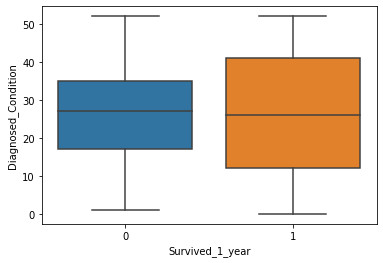

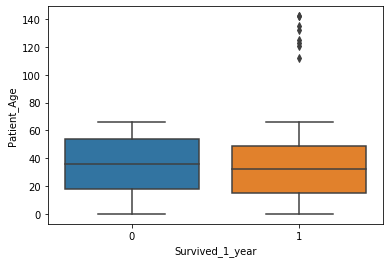

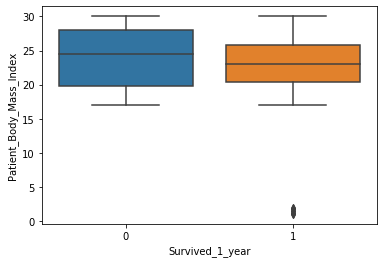

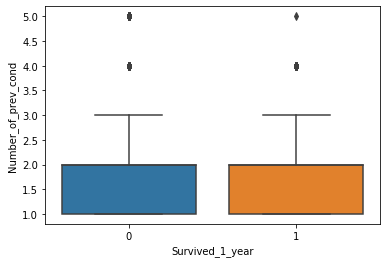

In [26]:
for feature in numeric_data.drop("Survived_1_year",axis=1).columns:
    sns.boxplot(x="Survived_1_year",y=feature,data=numeric_data)
    plt.show()
    

<p>Finally, we must look at the EDA for our categorical variables. However, before analyzing the categorical columns further, we will treat the missing values</p>

In [28]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

### Filling Missing Values

In [29]:
data["Treated_with_drugs"]=data["Treated_with_drugs"].fillna(data["Treated_with_drugs"].mode()[0
                                                                                              ])

In [30]:
data['A'].fillna(data['A'].mode()[0], inplace = True)
data['B'].fillna(data['B'].mode()[0], inplace = True)
data['C'].fillna(data['C'].mode()[0], inplace = True)
data['D'].fillna(data['D'].mode()[0], inplace = True)
data['E'].fillna(data['E'].mode()[0], inplace = True)
data['F'].fillna(data['F'].mode()[0], inplace = True)
data['Z'].fillna(data['Z'].mode()[0], inplace = True)

In [31]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

# EDA on Categorical Data

<p>EDA on Categorical Data
Let's perform Exploratory Data Analysis on the Categorical data. In the categorical_data variable we'll keep all the categorical features and remove the others.

Note that the features are not being removed from the main dataset - data. We'll select features with a feature selection technique later.</p>

In [32]:
categorical_data=data.drop(numeric_data.columns,axis=1)
# dropping the numerical columns from the dataframe 'data'
categorical_data.drop(["Patient_ID","ID_Patient_Care_Situation"],axis=1,inplace=True)
# dropping the id columns form the dataframe 'categorical data'
categorical_data.head()
 # Now we are left with categorical columns only. take a look at first five observaitons


,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z
0,DX2,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,DX6,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,DX6,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,DX6,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,DX1,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>Now we can look at the distributions of our categorical variables</p>

In [36]:
categorical_data.nunique()

Treated_with_drugs          64
Patient_Smoker               3
Patient_Rural_Urban          2
Patient_mental_condition     1
A                            2
B                            2
C                            2
D                            2
E                            2
F                            2
Z                            2
dtype: int64

<p>So 'Treated_with_drugs' column has 32 unique values while 'Patient_Smoker' has only 3 categorical values. 'Patient_mental_condition' column has only 1 categorical value.</p>

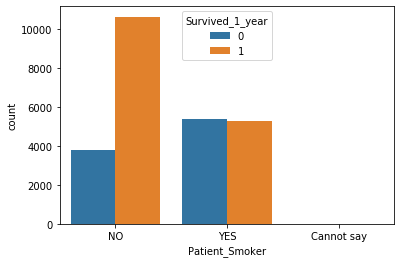

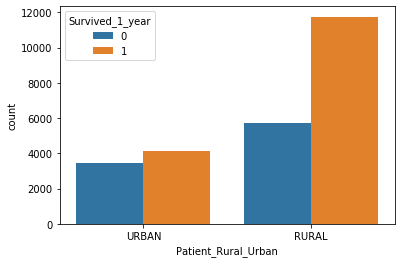

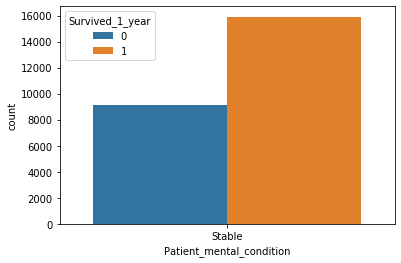

ValueError: Could not interpret input 'Survived_1_year'

<Figure size 1080x360 with 0 Axes>

In [37]:
# Visualization of categorical columns
for feature in ["Patient_Smoker","Patient_Rural_Urban","Patient_mental_condition"]:
    sns.countplot(x=feature,hue=data["Survived_1_year"],data=categorical_data)
    plt.show()
    
plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=categorical_data)
plt.xticks(rotation=90)
plt.show()

<p>Pre-Processing and Data Cleaning of Categorical Variables</p>

In [38]:
drugs=data["Treated_with_drugs"].str.get_dummies(sep=' ')
# split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,1,0,0,0,0,0


In [39]:
data=pd.concat([data,drugs],axis=1)
# concat the two dataframes 'drugs' and 'data'
data=data.drop("Treated_with_drugs",axis=1)
# dropping the column 'Treated_with_drugs' as its values are now splitted into different columns
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,16201,47,8433,60,21.655523,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,2.0,1,0,1,0,0,0,0
1,9421,3,2972,2,28.852743,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,3.0,0,0,0,0,0,0,1
2,16205,7,8608,20,26.179725,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1,0,0,0,0,0,1
3,5582,31,10074,8,22.638945,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
4,20880,43,7462,53,21.326131,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0


<p>'Patient_Smoker' is also a categorical column and we need to create dummies for this too. If you observe the data, the column 'Patient_Smoker' has a category 'Cannot say'.</p>

In [40]:
data.Patient_Smoker.value_counts()

NO            14402
YES           10669
Cannot say        8
Name: Patient_Smoker, dtype: int64

<p>There can be different ways to deal with the category 'Cannot say'. Here we will consider it as missing value and fill those entries with the mode value of the column.</p>

In [41]:
data.Patient_Smoker[data['Patient_Smoker']=="Cannot say"]="NO"
  # we already know 'NO' is the mode so directly changing the values 'Cannot say' to 'NO'

<p>The column 'Patient_mental_condition' has only one category 'stable'. So we can drop this column as for every observation the entry here is 'stable'. This feature won’t be useful for making the prediction of the target variable as it doesn’t provide any useful insights of the data. Hence, It is better to remove this kind of features</p>

In [43]:
data.drop("Patient_mental_condition",axis=1,inplace=True)


KeyError: "['Patient_mental_condition'] not found in axis"

<p>Now let's convert the remaining categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).</p>

In [44]:
data=pd.get_dummies(data,columns=["Patient_Smoker","Patient_Rural_Urban"])

In [45]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,16201,47,8433,60,21.655523,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,1
1,9421,3,2972,2,28.852743,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,1,1,0,1,0
2,16205,7,8608,20,26.179725,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,0,1,0
3,5582,31,10074,8,22.638945,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,0,1,0
4,20880,43,7462,53,21.326131,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 24 columns):
ID_Patient_Care_Situation    25079 non-null int64
Diagnosed_Condition          25079 non-null int64
Patient_ID                   25079 non-null int64
Patient_Age                  25079 non-null int64
Patient_Body_Mass_Index      25079 non-null float64
A                            25079 non-null float64
B                            25079 non-null float64
C                            25079 non-null float64
D                            25079 non-null float64
E                            25079 non-null float64
F                            25079 non-null float64
Z                            25079 non-null float64
Number_of_prev_cond          25079 non-null float64
Survived_1_year              25079 non-null int64
DX1                          25079 non-null int64
DX2                          25079 non-null int64
DX3                          25079 non-null int64
DX4                    

<p>There are two ID columns - 'ID_Patient_Care_Situation' and 'Patient_ID'. We can think of removing these columns if these are randomly generated value and there is not any id repeated like we had done for the 'PassengerId' in Titanic Dataset. 'PassengerId' was randomly generated for each passenger and none of the ids were repeated. So let's check these two ids columns.</p>

In [47]:
print(data.ID_Patient_Care_Situation.nunique())
# nunique() gives you the count of unique values in the column
print(data.Patient_ID.nunique())

23097
10599


<p>You can see there are 23097 unique 'ID_Patient_Care_Situation' and there are 23097 total observations in the dataset. So this column can be dropped.

Now, there are only 10570 unique values in the column 'Patient_ID'. This means there are some patient who came two or more times in the hospital because it is possible the same person was sick for two or more than two times (with different illness) and visited hospital for the treatment. And the same patient will have different caring condition for different diseases.

So there are some useful information in the column - 'Patient_ID' and thus we will not drop this column.</p>

In [49]:
data.drop(["ID_Patient_Care_Situation"],axis=1,inplace=True)

KeyError: "['ID_Patient_Care_Situation'] not found in axis"

## Prepare Train/Test Data

<p>Separating the input and output variables
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we can see that whether a person will survive after one year or not, depends on other variables like, age, diagnosis, body mass index, drugs used, etc.

By convention input variables are represented with 'X' and output variables are represented with 'y'.</p>

In [50]:
X=data.drop("Survived_1_year",axis=1)
y=data["Survived_1_year"]

<p>Train/test split
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.</p>

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
classifiers={
    "LogisticRegression":LogisticRegression(),
    "KNearest":KNeighborsClassifier(),
    "Support Vector Classifier":SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostedTrees":GradientBoostingClassifier(),
    "GaussianNB":GaussianNB()
}

In [56]:
from sklearn.model_selection import cross_val_score

for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score=cross_val_score(classifier,X_train,y_train,cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 72.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 63.0 % accuracy score
Classifiers:  SVC Has a training score of 64.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 79.0 % accuracy score
Classifiers:  AdaBoostClassifier Has a training score of 81.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 82.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 73.0 % accuracy score


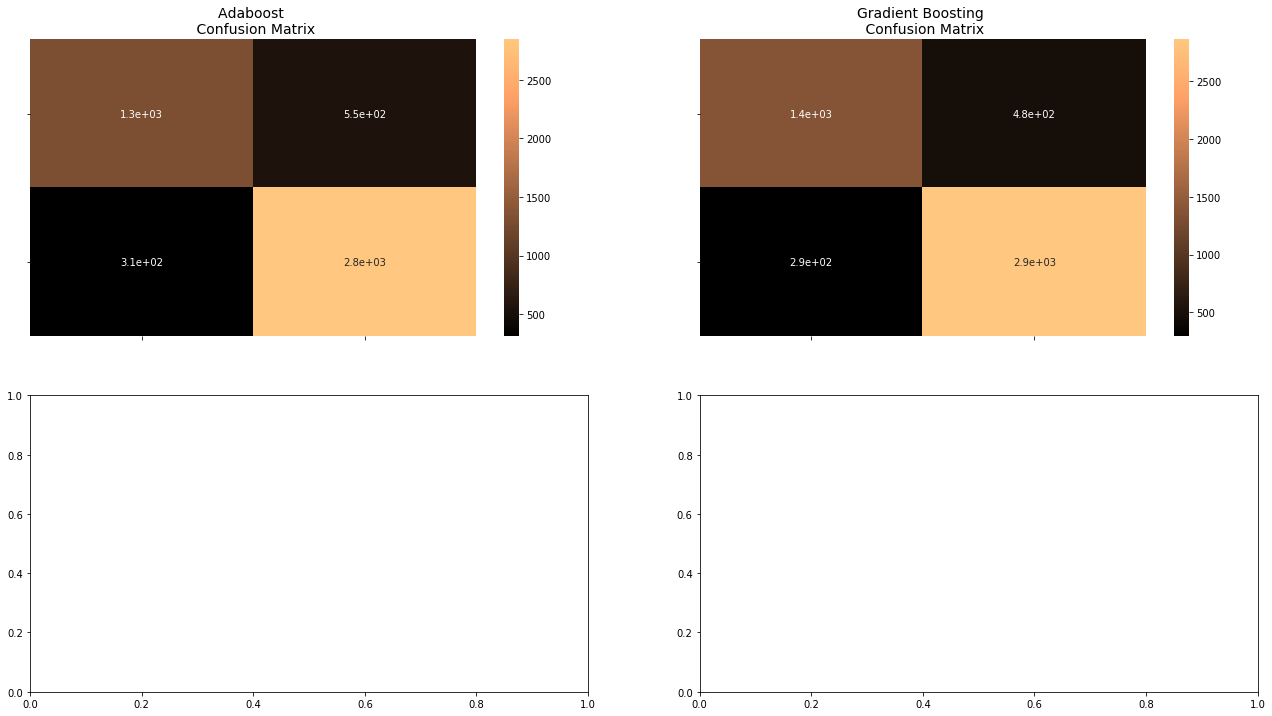

In [60]:
from sklearn.metrics import confusion_matrix

adaboost=AdaBoostClassifier()
gradientboost=GradientBoostingClassifier()

y_pred_adaboost=adaboost.fit(X_train,y_train)
y_pred_adaboost = adaboost.predict(X_test)


y_pred_gradient_boost=gradientboost.fit(X_train,y_train)
y_pred_gradient_boost=gradientboost.predict(X_test)




adaboost_cf = confusion_matrix(y_test, y_pred_adaboost)
gradientboost_cf = confusion_matrix(y_test, y_pred_gradient_boost)


fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(adaboost_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Adaboost \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(gradientboost_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("Gradient Boosting \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)




plt.show()

In [58]:
from sklearn.metrics import classification_report


print('Adaboost')
print(classification_report(y_test, y_pred_adaboost))

print('GradientBoosting')
print(classification_report(y_test, y_pred_gradient_boost))



Adaboost
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1858
           1       0.84      0.90      0.87      3158

    accuracy                           0.83      5016
   macro avg       0.82      0.80      0.81      5016
weighted avg       0.83      0.83      0.82      5016

GradientBoosting
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1858
           1       0.86      0.91      0.88      3158

    accuracy                           0.85      5016
   macro avg       0.84      0.83      0.83      5016
weighted avg       0.85      0.85      0.84      5016

